3. Support vector machines

Exercise 5: Implicit versus explicit (VG-Exercise)

In [1]:
###    Import all the useful classes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import time

In [2]:
###    Use the pd to read csv file and turn it into np.array
csv = pd.read_csv("microchips.csv",header=None,delimiter=",")
csv = np.array(csv.iloc[:,:])
X = csv[:,:2]
Y = csv[:,2]
X1 = X[:,0]
X2 = X[:,1]
a1 = min(X1)
a2 = max(X1)
b1 = min(X2)
b2 = max(X2)
print("X1.min   X1.max X2.min   X2.max")
print(a1,a2,b1,b2)

X1.min   X1.max X2.min   X2.max
-0.83007 1.0709 -0.76974 1.1089


In [3]:
###    Define the mapFeature function from Assignment 2
def mapFeature(X1, X2, D):
    """
    Map the features to a higher-dimensional space using polynomial features.
    Check the slides to have hints on how to implement this function.
    Parameters:
    X1 (array-like): Feature 1.
    X2 (array-like): Feature 2.
    D (int): Degree of polynomial features.

    Returns:
    X_poly (array-like): Polynomial features.
    """
    #--- Write your code here ---#
    one = np.ones([len(X1),1])
    Xe = np.c_[one,X1,X2]
    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j
            Xnew = Xnew.reshape(-1,1)
            Xe = np.append(Xe,Xnew,1)
    return Xe

In [4]:
###    Define the function to plot the decision boundary in Implicit condition
def decision_boundary_im(Model,X,Y):
    COLOR = []
    for i in range(len(Y)):
        if Y[i] == 1:
            COLOR.append("#FF0000")
        else:
            COLOR.append("#0000FF")
    plt.scatter(x=X[:,0],y=X[:,1],c=COLOR,s=2.5)
    model = Model
    model.fit(X,Y)
    x1_min = -0.9
    x1_max = 1.1
    x2_min = -0.8
    x2_max = 1.15
    x1s = np.linspace(x1_min,x1_max,200)
    x2s = np.linspace(x2_min,x2_max,200)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_point = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(X_point).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred, cmap='jet',alpha=0.5)

In [5]:
###    Define the function to plot the decision boundary in Implicit condition
def decision_boundary_ex(Model,X,Y,D):
    COLOR = []
    for i in range(len(Y)):
        if Y[i] == 1:
            COLOR.append("#FF0000")
        else:
            COLOR.append("#0000FF")
    plt.scatter(x=X[:,1],y=X[:,2],c=COLOR,s=2.5)
    model = Model
    model.fit(X,Y)
    x1_min = -0.9
    x1_max = 1.1
    x2_min = -0.8
    x2_max = 1.15
    x1s = np.linspace(x1_min,x1_max,200)
    x2s = np.linspace(x2_min,x2_max,200)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_point = mapFeature(x1.ravel(),x2.ravel(),D)
    y_pred = model.predict(X_point).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred, cmap='jet',alpha=0.5)

1. Degree = 2, Kernel = "poly" (Implicit)

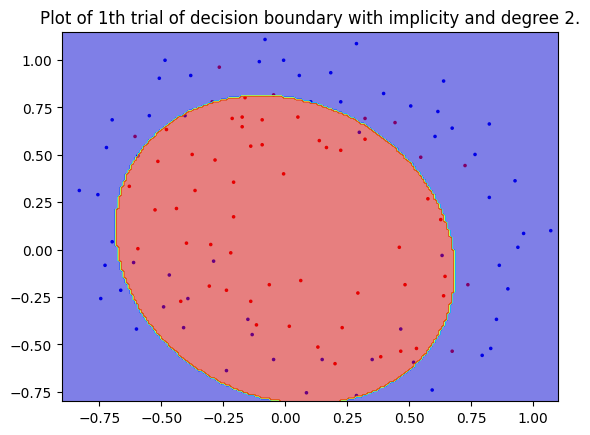

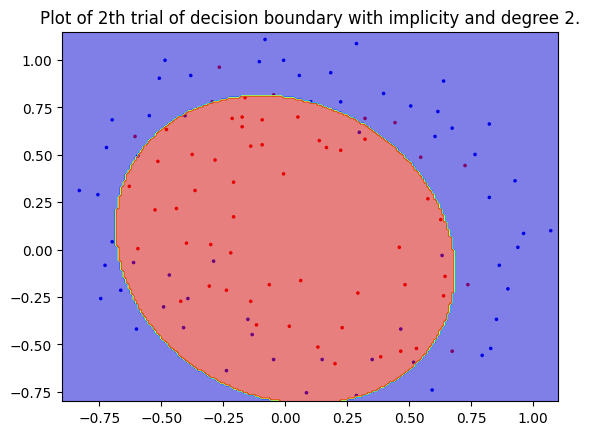

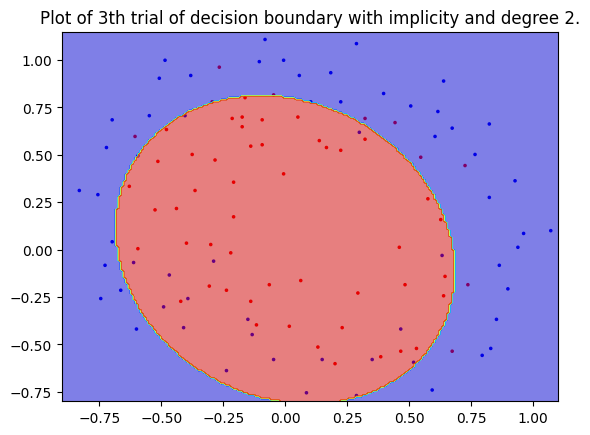

The average time for implicity and degree 2 with 3 trials is: 0.1121973991394043


In [6]:
time_1 = []
for i in range(3):
    tic = time.time()
    plt.figure()
    Model = svm.SVC(kernel="poly",degree=2)
    decision_boundary_im(Model,X,Y)
    plt.title(f"Plot of {i+1}th trial of decision boundary with implicity and degree 2.")
    plt.show()
    toc = time.time()
    time_1.append(toc-tic)
time_1_ = np.average(time_1)
print(f"The average time for implicity and degree 2 with 3 trials is: {time_1_}")

2. Degree = 2, Kernel = "linear" (Explicit)

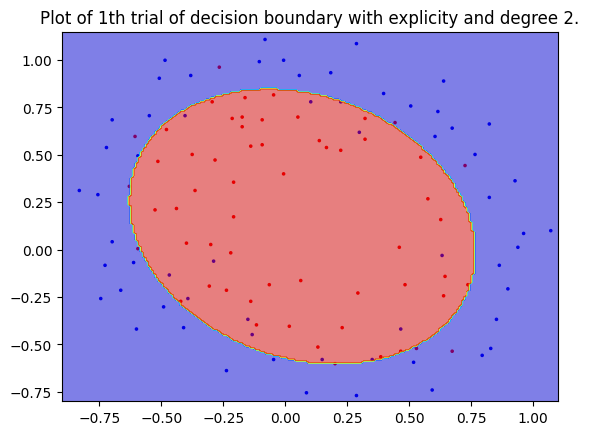

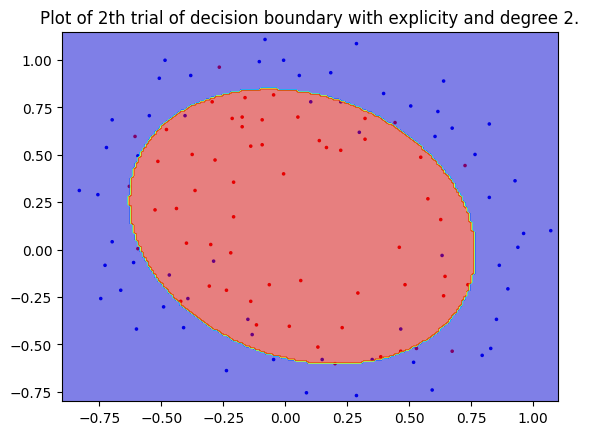

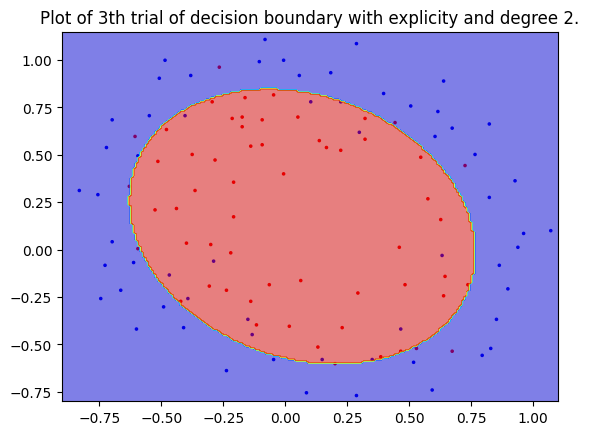

The average time for explicity and degree 2 with 3 trials is: 0.09839963912963867


In [7]:
time_2 = []
for k in range(3):
    tic = time.time()
    X_map_degree_2 = mapFeature(X1,X2,2)
    plt.figure()
    Model = svm.SVC(kernel="linear")
    decision_boundary_ex(Model,X_map_degree_2,Y,2)
    plt.title(f"Plot of {k+1}th trial of decision boundary with explicity and degree 2.")
    plt.show()
    toc = time.time()
    time_2.append(toc-tic)
time_2_ = np.average(time_2)
print(f"The average time for explicity and degree 2 with 3 trials is: {time_2_}")

3. Degree = 8, Kernel = "poly" (Implicit)

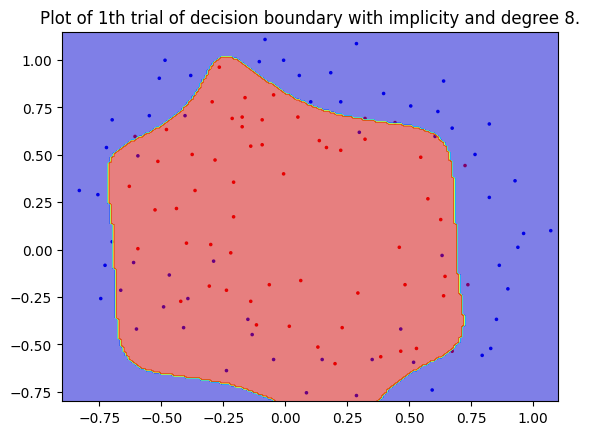

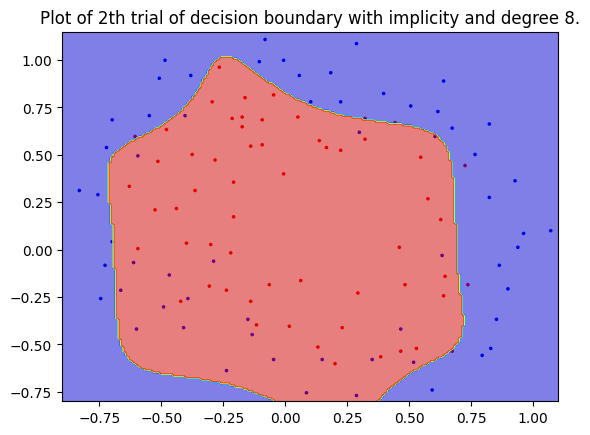

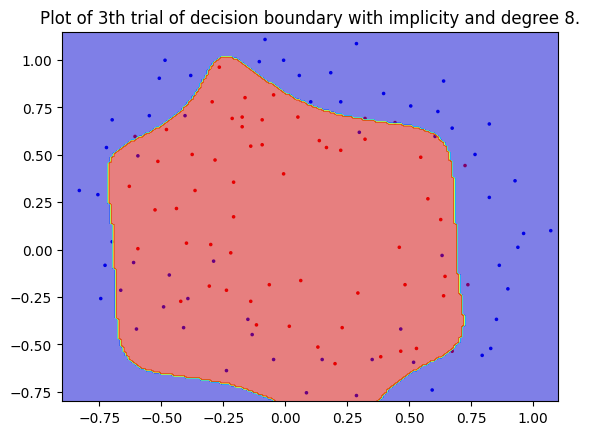

The average time for implicity and degree 8 with 3 trials is: 0.0909864107767741


In [8]:
time_3 = []
for i in range(3):
    tic = time.time()
    plt.figure()
    Model = svm.SVC(kernel="poly",degree=8)
    decision_boundary_im(Model,X,Y)
    plt.title(f"Plot of {i+1}th trial of decision boundary with implicity and degree 8.")
    plt.show()
    toc = time.time()
    time_3.append(toc-tic)
time_3_ = np.average(time_3)
print(f"The average time for implicity and degree 8 with 3 trials is: {time_3_}")

4. Degree = 8, Kernel = "linear" (Explicit)

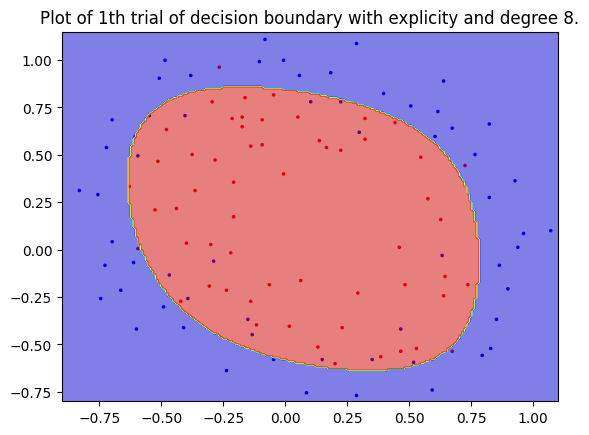

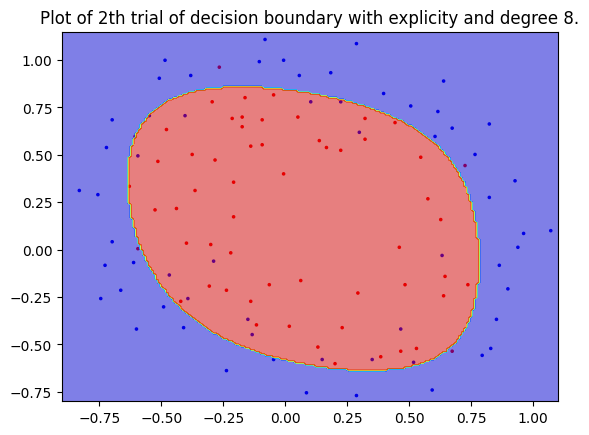

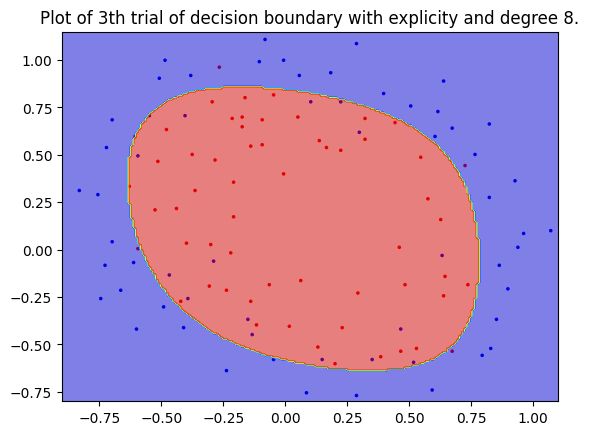

The average time for explicity and degree 8 with 3 trials is: 0.2428607145945231


In [9]:
time_4 = []
for k in range(3):
    tic = time.time()
    X_map_degree_8 = mapFeature(X1,X2,8)
    plt.figure()
    Model = svm.SVC(kernel="linear")
    decision_boundary_ex(Model,X_map_degree_8,Y,8)
    plt.title(f"Plot of {k+1}th trial of decision boundary with explicity and degree 8.")
    plt.show()
    toc = time.time()
    time_4.append(toc-tic)
time_4_ = np.average(time_4)
print(f"The average time for explicity and degree 8 with 3 trials is: {time_4_}")

5. Degree = 15, Kernel = "poly" (Implicit)

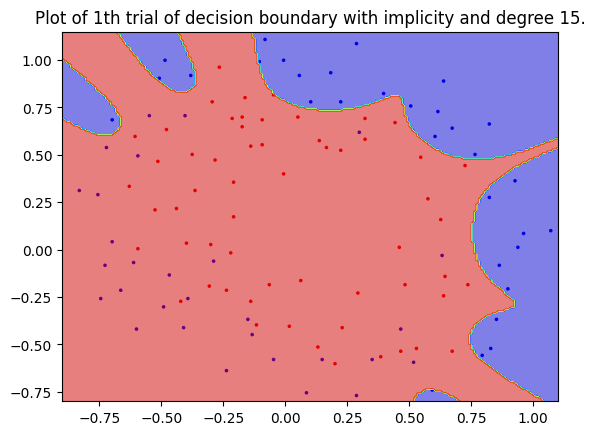

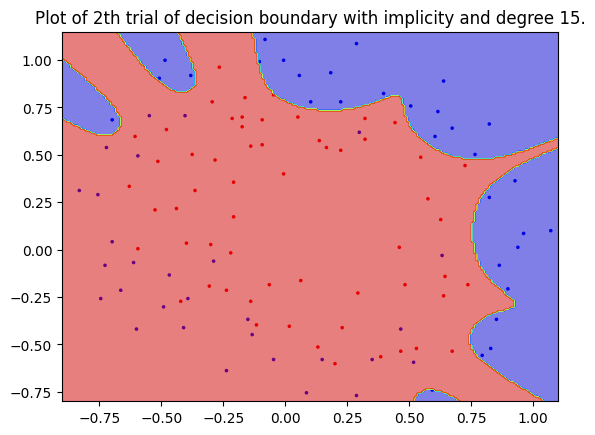

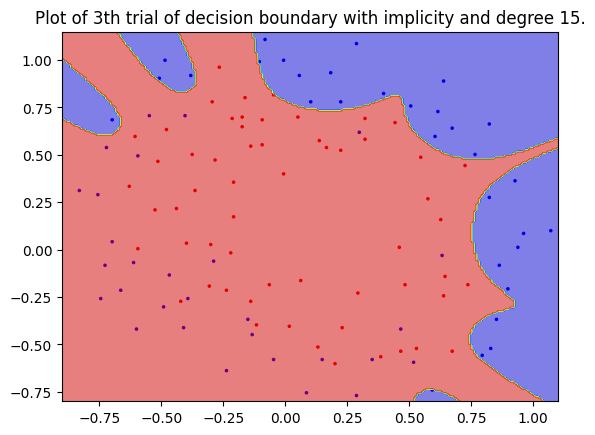

The average time for implicity and degree 15 with 3 trials is: 0.10031851132710774


In [10]:
time_5 = []
for i in range(3):
    tic = time.time()
    plt.figure()
    Model = svm.SVC(kernel="poly",degree=15)
    decision_boundary_im(Model,X,Y)
    plt.title(f"Plot of {i+1}th trial of decision boundary with implicity and degree 15.")
    plt.show()
    toc = time.time()
    time_5.append(toc-tic)
time_5_ = np.average(time_5)
print(f"The average time for implicity and degree 15 with 3 trials is: {time_5_}")

6. Degree = 15, Kernel = "linear" (Explicit)

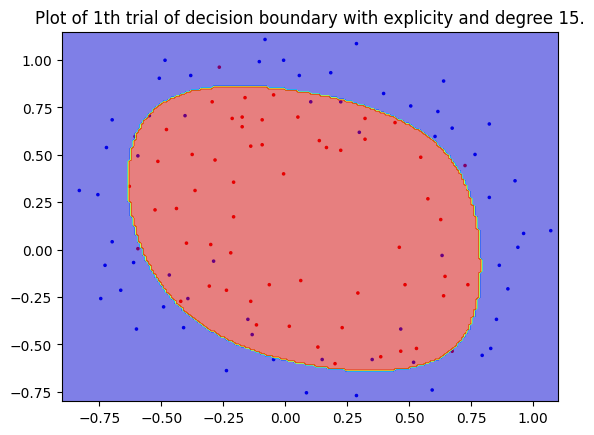

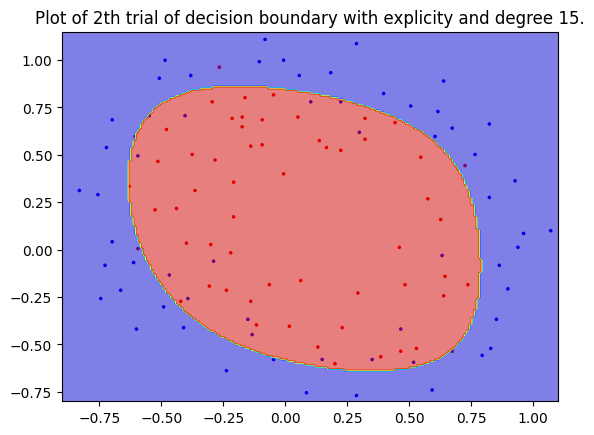

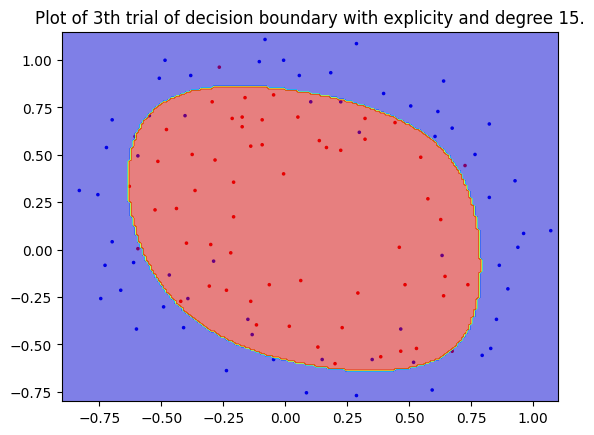

The average time for explicity and degree 15 with 3 trials is: 1.3108721574147542


In [11]:
time_6 = []
for k in range(3):
    tic = time.time()
    X_map_degree_15 = mapFeature(X1,X2,15)
    plt.figure()
    Model = svm.SVC(kernel="linear")
    decision_boundary_ex(Model,X_map_degree_15,Y,15)
    plt.title(f"Plot of {k+1}th trial of decision boundary with explicity and degree 15.")
    plt.show()
    toc = time.time()
    time_6.append(toc-tic)
time_6_ = np.average(time_6)
print(f"The average time for explicity and degree 15 with 3 trials is: {time_6_}")

Final!!!: Final Table Summary.

In [12]:
print("              Linear kernel (explicit)                   Poly kernel (implicit)")
print(f"Degree 2        {time_2_}                       {time_1_}")
print(f"Degree 8        {time_4_}                        {time_3_}")
print(f"Degree 15       {time_6_}                        {time_5_}")
print("The unit here is second (s).")

              Linear kernel (explicit)                   Poly kernel (implicit)
Degree 2        0.09839963912963867                       0.1121973991394043
Degree 8        0.2428607145945231                        0.0909864107767741
Degree 15       1.3108721574147542                        0.10031851132710774
The unit here is second (s).


Summary Answer:
We can see from the table upstairs that:

1. In Linear kernel (explicit):

When degree is becoming larger and larger, the time for explicit training process of svm is also becoming larger where the mapFeature process is becoming more complicated. This is because very high degrees of mapFeature process require more extra time than smaller degrees.

2. In Poly kernel (implicit):

The time remains approximately the same value (0.1s here) whatever degree of implicit training of svm it is, even with very large degree: 15. This is because it is an implicit svm training without the process of mapFeature.